In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np


2024-06-21 13:26:42.837094: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-21 13:26:42.837495: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 13:26:42.839883: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 13:26:42.872135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 13:26:43.484065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
# Load the entire model back from the file
model = load_model('lenet5_model.keras')
model.summary()

2024-06-21 13:26:44.156381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-21 13:26:44.156825: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images = tf.pad(test_images, [[0, 0], [2, 2], [2, 2]])
test_images = tf.cast(test_images, tf.float32) / 255.0


test_images = 1.0 - test_images # to invert colors

test_images.shape

TensorShape([10000, 32, 32])

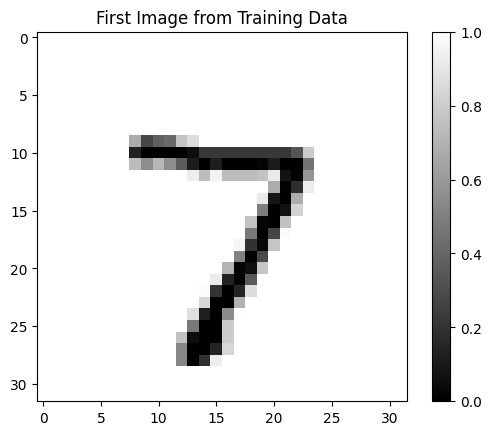

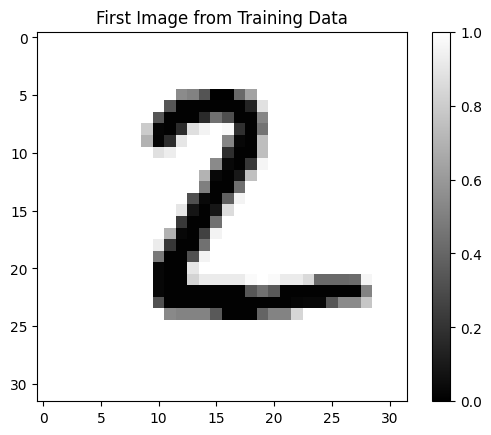

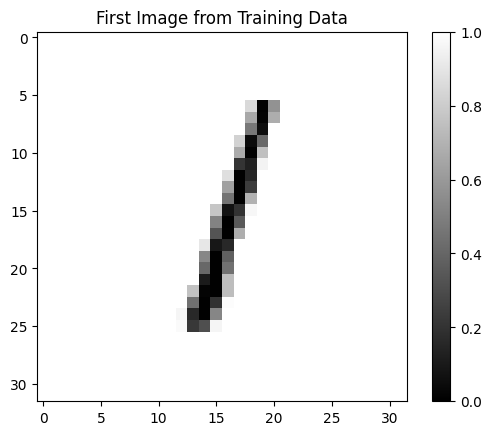

In [4]:
# Plotting the image
plt.imshow(test_images[0, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()
plt.imshow(test_images[1, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()
plt.imshow(test_images[2, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()

In [5]:
test_labels = to_categorical(test_labels, 10)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32)  # Only batch the test data (no need to shuffle)


In [6]:
predictions = model.predict(test_images) # returns matrix when each column represents confidence
print(test_images.shape)
class_prediction = np.argmax(predictions, axis=1)
print(class_prediction)
correct_prediction = np.argmax(test_labels, axis=1)
print(correct_prediction)

comparison = np.equal(class_prediction,correct_prediction)
true_count = np.sum(comparison)
print(f'Accuracy: {true_count/correct_prediction.shape[0]* 100}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
(10000, 32, 32)
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Accuracy: 96.82


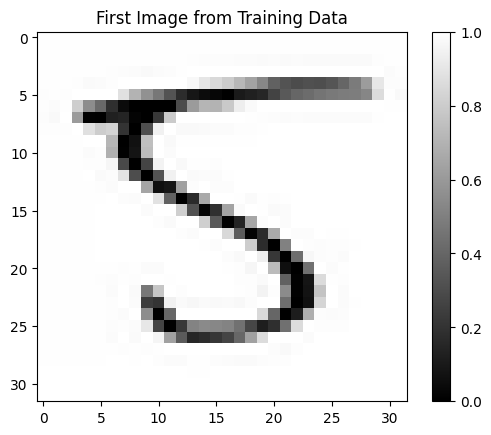

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted class: [5]


In [7]:
from PIL import Image
import numpy as np

def image_to_32x32_array(filepath):
    with Image.open(filepath) as img:
        img_gray = img.convert('L')
        img_resized = img_gray.resize((32, 32), Image.Resampling.LANCZOS)
        img_array = np.array(img_resized) / 255.0
        img_array = img_array.reshape(1, 32, 32)  # batch dimension, shape.x, shape.y
        return img_array


image_array = image_to_32x32_array('/home/luky/playground/handwriting_recognition/data/5.jpg')
plt.imshow(image_array[0, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()
predictions = model.predict(image_array)
class_prediction = np.argmax(predictions, axis=1)
print(f'Predicted class: {class_prediction}')